# Skewness

Skewness is a statistical measure that describes  the extent to which the data is skewed or lopsided. A normal distribution has a skewness of 0.

The formula for skewness is

$${\tt skewness} = {1 \over n} \sum (x_i - \mu)^3 / \sigma^3$$

A positive skewness indicates a distribution that is skewed to the right, meaning that it has a long tail on the right-hand side and most of the values are concentrated on the left-hand side. A negative skewness indicates a distribution that is skewed to the left, meaning that it has a long tail on the left-hand side and most of the values are concentrated on the right-hand side.

In [ ]:
import pandas as pd
census = pd.read_csv("https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv")
census

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
census['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Ages (years)')

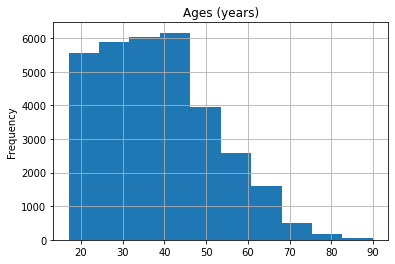

In [ ]:
census['age'].hist()
plt.ylabel("Frequency")
plt.title("Ages (years)")

We have plotted the ages of adult respondants to a US census survey and see that the mean age is 38.47, the median age is 37 and the 75th percentile age is 47.  We see that the data is right-skewed as there is a long tail of older people, up to 90 years old.

## Diagnosis

One of way to recognize skewness is to look at the data using histograms, density plots, or boxplots to see if there is a long tail on one side.

Another way is to look at the mean, median and mode. If the mean is greater than the median, this suggests that the distribution is skewed to the right, while if the mean is less than the median, this suggests that the distribution is skewed to the left.

A third way is to use the skewness formula given above.  A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.

## Damage

When a distribution is skewed, the mean is pulled in the direction of the longer tail, which can make it an inaccurate measure of the central tendency. In this case, the median may be a better measure of the central tendency. Similarly, the standard deviation may be influenced by the skewness, which can make it an inaccurate measure of the distribution of the data; we would underestimate the probability of certain data on the side with the long tail if we were to model based on a normal distribution with the given mean and standard deviation.

Skewness can affect the distribution of returns, making it more difficult to estimate the true risk of an investment. In particular, the presence of  skewness can lead to a higher probability of extreme losses.

## Directions

One approach to address skewness is to apply transformations to the data, such as logarithmic or power transformations. These transformations can help to make the distribution more symmetric and reduce the impact of outliers.

Another approach is to try to use estimators that are robust to skewness, such as taking the median instead of the mean.

We can also try to use different models such as a skewed-normal or skewed-t distribution which will help capture the skewness in the data.


# Kurtosis and Heteroscedasticity

---



Kurtosis is a statistical measure that describes the shape of a distribution. It provides information about the degree of peakedness and the thickness of the tails of a probability distribution relative to the normal distribution.

The formula for Kurtosis is:
$${\tt kurtosis} = {1 \over n} \sum (x_i - \mu)^4 / \sigma^4$$

Sometimes we subtract 3 to get the excess kurtosis (a normal distribution will have kurtosis 3 according to the above formula).

Higher kurtosis indicates a distribution that is more peaked and has heavier tails than the normal distribution, while lower kurtosis indicates a distribution that is less peaked and has lighter tails than the normal distribution.

Heteroscedasticity is a term used in statistics to describe the situation where the variance of the errors or residuals of a statistical model is not constant across the range of values of the independent variable. In other words, the spread of the residuals is different for different values of the predictor variable.





In [ ]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
data = r.json()
apple = pd.DataFrame(data["Time Series (Daily)"])
apple = apple.T  # Transpose Dataframe for desired results
apple = apple.rename(columns=lambda x: re.sub('\d+\. *','',x))
apple =  apple.apply(lambda col:pd.to_numeric(col, errors='coerce'))
apple.index = pd.to_datetime(apple.index)
apple.index.name="date"

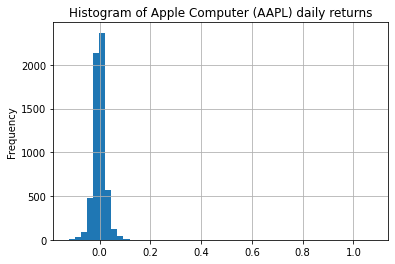

In [ ]:
apple_daily_return = apple['adjusted close'].pct_change(1).dropna() # 1 for ONE DAY lookback
apple_daily_return.hist(bins=50)
plt.ylabel("Frequency")
plt.title("Histogram of Apple Computer (AAPL) daily returns")
plt.show()

In [ ]:
apple_daily_return.kurt() # Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0).

372.99671323426963

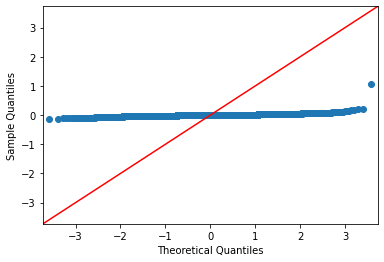

In [ ]:
import statsmodels.api as sm
sm.qqplot(apple_daily_return, line='45')
plt.show()

The QQ plot and histogram indicate that the daily returns on Apple Computer Corporation stock is leptokurtic; it has a very high excess kurtosis. There are heavy tails in the distribution of returns.  This is confirmed by the numerical computation of the kurtosis given above.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('http://web.pdx.edu/~crkl/ceR/data/greene.txt',sep='\s+',nrows=51).dropna()
print(data.describe())

spending = data['SPENDING']
income = data['INCOME']

df1 = pd.concat([spending,income],keys=['spending','income'],axis=1)
model1 = smf.ols(formula='spending~income+I(income**2)',data = df1).fit()
print(model1.summary())

         SPENDING        INCOME
count   50.000000     50.000000
mean   373.260000   7608.560000
std     94.553259   1050.644412
min    259.000000   5736.000000
25%    315.250000   6655.000000
50%    354.000000   7575.000000
75%    426.250000   8296.250000
max    821.000000  10851.000000
                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     44.68
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.34e-11
Time:                        19:01:19   Log-Likelihood:                -271.27
No. Observations:                  50   AIC:                             548.5
Df Residuals:                      47   BIC:                             554.3
Df Model:                           2                                         
C

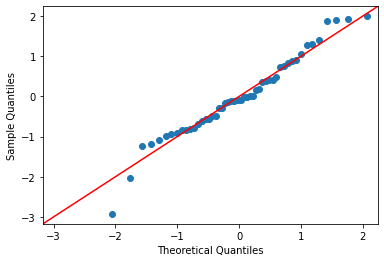

In [ ]:
resid1 = model1.resid
# QQ-Plot of residuals
fig1 = sm.qqplot(resid1,fit=True,line='45')
plt.show()

eval_env: 1


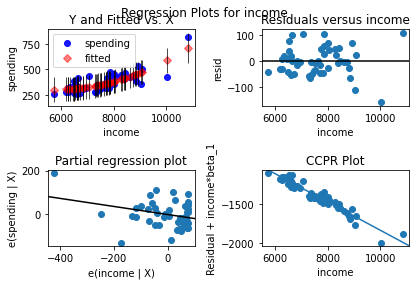

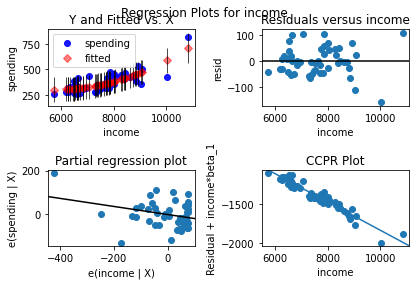

In [ ]:
import statsmodels.api as sm
sm.graphics.plot_regress_exog(model1, 'income')

The plot of residual vs income appears to indicate that the residuals are more spread apart for higher incomes, which indicates that there is a heteroskedastiity issue.  

## Diagnosis

We can recognize kurtosis in different ways.  One way is to look at various plots such as a histogram or QQ-plot.  In a histogram we can try to see if the distribution looks too peaked or too flat compared to the normal distribution.  

Another way is to use the kurtosis formula given above. For a normal distribution we should get kurtosis of 3; if the kurtosis is higher, the distribution is leptokurtic and has fat tails; if the kurtosis is lower the distribution is platykurtic.

We can recognize heteroskecasticity by looking at the residual plots. If the data is heroscedastic, we will see a funnel shape or a pattern where the spread of data increases or decreases.

You could also try a Breusch-Pagan test or White test to test for heteroskedasticity. These tests are available in `statsmodels.stats.api`

## Damage

Kurtosis in financial data can lead to problems in estimates of the variance. It can also result in incorrect confidence intervals, as traditional statistical methods assume that the data are normally distributed. If the data are not normally distributed, the confidence intervals may be too wide or too narrow, leading to incorrect inferences about the true population parameters.
It can lead to underestimating risk of extreme events.

Heteroscedasticity can lead to poor estimates of the coefficients in regression models.

Heteroscedasticity can lead to incorrect inferences about the relationships between variables. For example, if there is heteroscedasticity in the error term of a regression model, the t-statistics and confidence intervals may be incorrect, which can lead to incorrect conclusions about the significance of the variables.


## Directions

One way to address kurtosis is to try to do a transform of the data such as Box-Cox transform. An alternative is to use a different model such as GARCH (Generalized autoregressive conditional heteroskedasticity) which is able to handle fat-tails.

We can address heteroskedasticity by using weighted least squares (WLS) instead of OLS: WLS is a technique that assigns weights to observations based on their variances. This approach can help mitigate the effects of heteroskedasticity by giving less weight to observations with high variances and more weight to observations with low variances.

# Over-reliance on the Gaussian distribution

The Gaussian distribution is a symmetric probability distribution.  The probability distribution function (PDF) of a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$ is $f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$.

The graph of the gaussian distribution looks like a bell-shaped curve. The curve is centered around a single peak, and the data points on either side of the peak decrease in frequency in a symmetrical pattern.


In [ ]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"])
df = df.T  # Transpose Dataframe for desired results
df = df.rename(columns=lambda x: re.sub('\d+\. *','',x))
df =  df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.index = pd.to_datetime(df.index)
df.index.name="date"

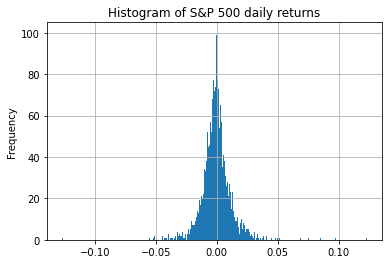

In [ ]:
daily_return = df['adjusted close'].pct_change(1).dropna() # 1 for ONE DAY lookback
daily_return.hist(bins=1000)
plt.ylabel("Frequency")
plt.title("Histogram of S&P 500 daily returns")
plt.show()

In [ ]:
import scipy.stats
scipy.stats.normaltest(daily_return)

NormaltestResult(statistic=1296.0814340377929, pvalue=3.626540651853405e-282)

We have looked at the daily return on the SPY S&P 500 ETF.  We can see from the histogram plot that there appears to be skewness in the data.  We can also see from the normality test that we get a low p-value which indicates that we should reject the null hypothesis that the data is normal.

This suggests that daily returns are not normal.

## Diagnosis

To determine if data satisfies a normal distribution, we can apply one of various statistical tests for normality.  One option is to use `scipy.stats.normaltest` which uses a test devised by D’Agostino and Pearson based on the skewness and kurtosis.  Another option is to use `scipy.stats.shapiro` which uses the Shapiro-Wilke test which is based on looking at the values of the data in order.

We can also look at plots such as histograms, boxplots or viola plots.  We can also look at Q-Q plots: If the data are normally distributed, the points on the Q-Q plot should form a straight line.

## Damage

Underestimation of tails: The tails of a Gaussian distribution decrease rapidly; extreme values are unlikely to occur. However, in many real-world scenarios, extreme values are more common than predicted by the Gaussian distribution. This can lead to an underestimation of the probability of rare events, such as financial market crashes.

Inaccurate parameter estimation: The Gaussian distribution is characterized by its mean and standard deviation. However, if the data does not follow a Gaussian distribution, using these parameters to estimate the distribution can lead to inaccurate results; for example if the data is skewed the mean is misleading because the data are not symmetrical about the mean, and the standard deviation is also misleading because we underestimate the probability of events on one side, where there is a long tail.

Ignoring skewness and kurtosis: The Gaussian distribution is symmetric, which means that it has zero skewness and kurtosis. However, many real-world data sets are not symmetric, and ignoring these measures of asymmetry and peakedness can lead to incorrect conclusions.  In particular, leptokurtic data will have fat tails, where we will underestimate the probability of rare events.

## Directions

If tests indicate our data are non-normal then we can try to model the data with another distribution.

For example, we can use a student t distribution if we want to have fatter tails, or we can use a skew-normal distribution if we want to model skewness.

Another way to address non-normal data is to transform the data using mathematical functions such as logarithmic, exponential, or square root transformations. These transformations can help to normalize the data distribution and make it more suitable for traditional statistical methods such as linear regression.

# Non-Stationarity

Non-stationarity means that the statistical properties of a times series change over time. A process is weakly stationary if its mean and autocovariance do not change over time, and the variance is always finite:
$$
\begin{align}
& \mu_X(t) = \mu_X(t + \tau) & & \text{for all } \tau,t \\
& \text{cov}(X_{t-h},X_{t}) & & \text{is independent of } t \\
& \operatorname E[|X_t|^2] < \infty & & \text{for all } t
\end{align}
$$

There is also strict stationarity, which is harder to check.  It says that the joint probability distribution of  joint probability distribution of $\{ X_t \}: \{ x_{t_1}, x_{t_2}, \cdots, x_{t_k} \}$ is the same as that of $\{ x_{t_{1}+h}, x_{t_{2}+h}, \cdots, x_{t_{k}+h} \}$.


Examples of non-stationary processes are a random walk, which will have the same mean over time, but as time goes on, the variance of the difference tends to increase, hence the covariance will depend on time.


In [ ]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"])
df = df.T  # Transpose Dataframe for desired results
df = df.rename(columns=lambda x: re.sub('\d+\. *','',x))
df =  df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.index = pd.to_datetime(df.index)
df.index.name="date"


In [ ]:
df

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
date,,,,,,,,
2023-03-10,390.990000,393.160000,384.320000,385.910000,385.910000,189252996,0.0,1.0
2023-03-09,399.740000,401.480000,390.530000,391.560000,391.560000,111945322,0.0,1.0
2023-03-08,398.390000,399.710000,396.590000,398.920000,398.920000,74746632,0.0,1.0
2023-03-07,404.420000,404.670000,397.625000,398.270000,398.270000,108310596,0.0,1.0
2023-03-06,405.050000,407.450000,404.010000,404.470000,404.470000,72795946,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-05,138.625000,139.109299,136.781204,137.875000,90.068563,7431500,0.0,1.0
1999-11-04,136.750000,137.359299,135.765594,136.531204,89.190712,7907500,0.0,1.0
1999-11-03,136.000000,136.375000,135.125000,135.500000,88.517065,7222300,0.0,1.0


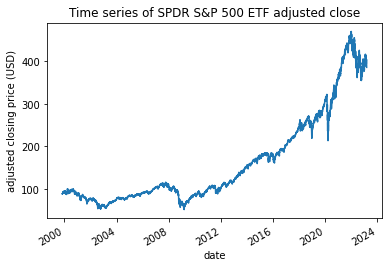

In [ ]:
df['adjusted close'].plot()
plt.ylabel("adjusted closing price (USD)")
plt.title("Time series of  S&P 500 ETF adjusted close")
plt.show()

This plot indicates that the S&P 500 price is increasing.  Hence the time series is not a stationary series because the mean is increasing. We can also see this in the data table of close values.  We can see that between 1999 and 2023 the S&P 500 has nearly quadrupled in price.

## Diagnosis

A basic way to check for stationarity in a time series is to look at a plot of the data and check for a trend or seasonal components.

Another way is to sample and look at the mean and autocovariance.

A more robust way is to do a Dickey–Fuller test or Augmented Dickey-Fuller (ADF. In this case we are trying to do statistical tests to try to use an autoregressive model.  We are trying to reject the null hypothesis that α=1; this will allow us to conclude that the series is nonstationary.

We can use the `adfuller` function from `statsmodels.tsa.stattools` to run this




## Damage

If you apply time-series methods to a non-stationary series, several problems can occur:

Misleading Results: Non-stationary time series can show spurious correlation, leading to false results For example, a correlation between two non-stationary variables may indicate a causal relationship, which may not be true.

Inaccurate Forecasts: Time series models rely on the assumption that the statistical properties of the data remain constant over time. Non-stationary time series violate this assumption, and as a result, forecasts made using these models may be inaccurate. For example, a time series model may predict a trend to continue in the future, but if the trend is not stationary, the actual trend may be different.

Incorrect Parameter Estimation: Time series models require the estimation of parameters based on the historical data. However, non-stationary time series can have changing statistical properties, and estimating parameters based on historical data may not be accurate. This can lead to incorrect model specifications and predictions.

Model Instability: Non-stationary time series can also lead to model instability, which means that the model's coefficients may change over time. This can lead to inaccurate predictions and unreliable results.

## Directions

If a time series is non-stationary, then we can do various preprocessing techniques to make it stationary before applying time sires methods.

* We can take differences to make the series stationary
* We can use an ARIMA model which will incorporate taking differences
* We can try to find a trend and then get a new series after subtracting out the trend
* We can find a seasonal component and subtract it out

References:

Kempthorne, Peter J. "Summarizing Data." MIT OpenCourseWare, 2015, https://ocw.mit.edu/courses/18-443-statistics-for-applications-spring-2015/60566d882db226c2f71b081d9fbc139d_MIT18_443S15_LEC12.pdf.

